# **O desafio**

Atualmente, a Tom atua na gestão da educação pública em parceria com o gorverno. O desafio parte da necessidade da Tom identificar e analisar as principais diferenças entre um de seus serviços, a contratação e gestão de carga horária de professores. 


## **Sumário**

1. Importação das bibliotecas e dos dados
2. Limpeza das tabelas
3. 

In [97]:
# Manipulação dos dados
import pandas as pd
import numpy as np

# Visualização dos dados
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings

filterwarnings('ignore')

# Manipulacao de arquivos e caminhos
from pathlib import Path

ROOT_DIR = Path().cwd().parent
DATA_DIR = ROOT_DIR / "data"
FILE_PATH = DATA_DIR / "data.xlsx"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(
    context="notebook",
    style="whitegrid",
    palette="colorblind",
    font="Arial",
    font_scale=1.0
)
plt.rc("figure", figsize=(12, 6), dpi=120)


In [98]:
sheets = pd.ExcelFile(FILE_PATH)

names = sheets.sheet_names

names.remove('Auxiliares>>>>')

In [99]:
SHEET_KEYS = {
    i: name
    for i, name in enumerate(names)
}

SHEET_KEYS

{0: 'Resumo Executivo',
 1: 'Análise CH por Escola',
 2: 'BD_Tom Folha',
 3: 'BD_SistemaGov',
 4: 'Valores por escola',
 5: 'Página30'}

In [100]:
hc_per_school = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[1])

print(hc_per_school.shape)
hc_per_school.head()

(128, 9)


,Mês,Escola,CÓDIGO ESCOLA,Valor Unitário Carga Horária,CH Regência,CH Sem Regência,Valor Regência,Valor Sem Regência,Valor CH Mensal
0,janeiro,ESCOLA A,ABC1,NaN,NaN,NaN,NaN,NaN,NaN
1,janeiro,ESCOLA B,ABC2,NaN,NaN,NaN,NaN,NaN,NaN
2,janeiro,ESCOLA C,ABC3,NaN,NaN,NaN,NaN,NaN,NaN
3,janeiro,ESCOLA D,ABC4,NaN,NaN,NaN,NaN,NaN,NaN
4,janeiro,ESCOLA E,ABC5,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
tom_payroll = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[2])

print(tom_payroll.shape)
tom_payroll.head()

(3085, 12)


,Mês,Escola,CodEscola,Nome,CodFuncionario,SITUACAO,ADM,DESCRICAO_CARGO,DESCRICAO_VERBA,Horas Mes,Categoria,Dt demissão
0,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100.0,Trabalhando,2025-02-03,COORDENADOR(A) DE CURSO,HORAS,70.0,NAO REGENCIA,NaT
1,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,45.0,REGENCIA,NaT
2,Fevereiro,ESCOLA A,ABC1,Márcio Wagner,101.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,27.0,REGENCIA,NaT
3,Fevereiro,ESCOLA A,ABC1,Igor Souza Quirino,102.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,49.5,REGENCIA,NaT
4,Fevereiro,ESCOLA A,ABC1,João Miguel Oliveira Vieira,103.0,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,40.5,REGENCIA,NaT


In [102]:
gov_payroll = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[3])

print(gov_payroll.shape)
gov_payroll.head()

(6780, 14)


,Mês,Escola,CodEscola,Nome Funcionario,CodFuncionario,Tipo,DisciplinaFuncao,DisciplinaFuncaoDescricao,PeriodoIni,PeriodoFim,DiasTrabalhados,CHSuprimento,CHDiaria,CHPeriodo
0,Fevereiro,ESCOLA Z,ABC23,Bruna Diniz,680,REGENCIA,6279,LITER ART E MOVIMENTO I,2025-02-03,2025-02-28,26,8,1.142857,29.714282
1,Fevereiro,ESCOLA Z,ABC23,Bruna Diniz,680,REGENCIA,6363,ELETIVA I,2025-02-03,2025-02-28,26,4,0.571428,14.857128
2,Fevereiro,ESCOLA Z,ABC23,Yolanda Sales,681,REGENCIA,704,ARTE,2025-02-03,2025-02-28,26,8,1.142857,29.714282
3,Fevereiro,ESCOLA Z,ABC23,Yolanda Sales,681,REGENCIA,732,ARTE II,2025-02-03,2025-02-28,26,2,0.285714,7.428564
4,Fevereiro,ESCOLA Z,ABC23,Yolanda Sales,681,REGENCIA,5641,PROJETO DE VIDA I,2025-02-03,2025-02-28,26,25,3.571428,92.857128


In [103]:
school_values = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[4])

print(school_values.shape)
school_values.head()

(32, 3)


,Escola,CodEscola,Valor Unitário Carga Horária
0,ESCOLA Z,ABC23,23.09
1,ESCOLA N,ABC14,29.27
2,ESCOLA O,ABC15,29.27
3,ESCOLA E,ABC5,29.27
4,ESCOLA F,ABC6,27.21


In [104]:
teachers_match = pd.read_excel(FILE_PATH, sheet_name=SHEET_KEYS[5])

teachers_match.head()

,UNIQUE,Unnamed: 1,Unnamed: 2,conit,Unnamed: 4,UNIQUE.1,CÓDIGO ESCOLA,Escola
0,61008303100,100,Andressa Aguiar,1,NaN,41128656.0,ABC1,ESCOLA A
1,9966162925,101,Márcio Wagner,1,NaN,41129792.0,ABC2,ESCOLA B
2,638731925,102,Igor Souza Quirino,1,NaN,41131479.0,ABC3,ESCOLA C
3,5743855927,103,João Miguel Oliveira Vieira,1,NaN,41131908.0,ABC4,ESCOLA D
4,2334064920,104,Dennis Oshima,1,NaN,41135784.0,ABC5,ESCOLA E


Limpeza das tabelas

In [105]:
print(hc_per_school[['Mês', 'Escola']].info())

grouped_schools = hc_per_school.groupby('Mês')['Escola'].count()

grouped_schools

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mês     128 non-null    object
 1   Escola  128 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB
None


Mês
abril        32
fevereiro    32
janeiro      32
março        32
Name: Escola, dtype: int64

In [106]:
hc_per_school = hc_per_school.rename(columns={
    'Mês': 'mes',
    'Escola': 'escola',
    'CÓDIGO ESCOLA': 'codigo_escola',
    'Valor Unitário Carga Horária': 'valor_unitario_carga_horaria',
    'CH Regência': 'ch_regencia',
    'Valor Regência': 'valor_regencia',
    'Valor Sem Regência': 'valor_sem_regencia',
    'Valor CH Mensal': 'valor_ch_mensal',
})

hc_per_school.columns

Index(['mes', 'escola', 'codigo_escola', 'valor_unitario_carga_horaria',
       'ch_regencia', 'CH Sem Regência', 'valor_regencia',
       'valor_sem_regencia', 'valor_ch_mensal'],
      dtype='object')

In [107]:
print(hc_per_school[['mes', 'escola']].isna().sum())
print(hc_per_school[['mes', 'escola']].duplicated(keep=False).sum())

mes       0
escola    0
dtype: int64
0


In [108]:
tom_payroll = tom_payroll.rename(columns={
    'Mês': 'mes',
    'Escola': 'escola',
    'CodEscola': 'codigo_escola',
    'Nome': 'nome',
    'CodFuncionario': 'codigo_funcionario',
    'SITUACAO': 'situacao',
    'ADM': 'data_admissao',
    'DESCRICAO_CARGO': 'descricao_cargo',
    'DESCRICAO_VERBA': 'descricao_verba',
    'Horas Mes': 'ch_total',
    'Categoria': 'categoria',
    'Dt demissão': 'data_demissao',
})

print(tom_payroll.info())
print(tom_payroll.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mes                 3085 non-null   object        
 1   escola              3085 non-null   object        
 2   codigo_escola       3085 non-null   object        
 3   nome                3078 non-null   object        
 4   codigo_funcionario  3078 non-null   float64       
 5   situacao            3085 non-null   object        
 6   data_admissao       1964 non-null   datetime64[ns]
 7   descricao_cargo     3085 non-null   object        
 8   descricao_verba     3085 non-null   object        
 9   ch_total            3085 non-null   float64       
 10  categoria           3085 non-null   object        
 11  data_demissao       189 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 289.3+ KB
None
       codigo_funcionario      

In [109]:
tom_payroll.isna().sum()

mes                      0
escola                   0
codigo_escola            0
nome                     7
codigo_funcionario       7
situacao                 0
data_admissao         1121
descricao_cargo          0
descricao_verba          0
ch_total                 0
categoria                0
data_demissao         2896
dtype: int64

In [110]:
tom_payroll[(tom_payroll['nome'].isna()) | (tom_payroll['codigo_funcionario'].isna())]

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao
1994,Abril,ESCOLA A,ABC1,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,54.0,REGENCIA,NaT
2047,Abril,ESCOLA G,ABC7,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,18.9,REGENCIA,NaT
2640,Abril,ESCOLA W,ABC21,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,18.0,REGENCIA,NaT
2641,Abril,ESCOLA W,ABC21,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,20.0,REGENCIA,NaT
2800,Abril,ESCOLA Z,ABC23,NaN,NaN,Trabalhando,NaT,COORDENADOR(A) PEDAGOGICO,HORAS,100.0,NAO REGENCIA,NaT
2859,Abril,ESCOLA J,ABC10,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,14.7,REGENCIA,NaT
3048,Abril,ESCOLA M,ABC13,NaN,NaN,Trabalhando,NaT,PROFESSOR(A),HORAS,12.6,REGENCIA,NaT


Esses registros devem ser removidos, uma vez que nao apresentam valores para nome, nem codigo_funcionario (identificadores que sao cruciais para encontrar os professores em ambas as bases). 

In [111]:
tom_payroll = tom_payroll.dropna(subset=['codigo_funcionario', 'nome'])
print(tom_payroll.shape)

(3078, 12)


In [112]:
tom_payroll.duplicated(keep=False).sum()

np.int64(4)

In [113]:
tom_payroll[tom_payroll.duplicated(keep=False)]

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao
1167,Março,ESCOLA AE,ABC28,Felipe Zago,411.0,Trabalhando,2025-03-06,PROFESSOR(A),HORAS,9.0,REGENCIA,NaT
1168,Março,ESCOLA AE,ABC28,Felipe Zago,411.0,Trabalhando,2025-03-06,PROFESSOR(A),HORAS,9.0,REGENCIA,NaT
1332,Março,ESCOLA AH,ABC31,Santiago Souza Tavares,893.0,Trabalhando,2025-03-05,PROFESSOR(A),HORAS,30.0,REGENCIA,NaT
1333,Março,ESCOLA AH,ABC31,Santiago Souza Tavares,893.0,Trabalhando,2025-03-05,PROFESSOR(A),HORAS,30.0,REGENCIA,NaT


In [114]:
tom_payroll = tom_payroll.drop_duplicates(keep='first')

tom_payroll.duplicated(keep=False).sum()

np.int64(0)

In [115]:
gov_payroll = gov_payroll.rename(columns={
    'Mês': 'mes',
    'Escola': 'escola',
    'CodEscola': 'codigo_escola',
    'Nome Funcionario': 'nome_funcionario',
    'CodFuncionario': 'codigo_funcionario',
    'Tipo': 'categoria',
    'DisciplinaFuncao': 'disciplina_funcao',
    'DisciplinaFuncaoDescricao': 'disciplina_funcao_descricao',
    'PeriodoIni': 'periodo_ini',
    'PeriodoFim': 'periodo_fim',
    'DiasTrabalhados': 'dias_trabalhados',
    'CHSuprimento': 'ch_suprimento',
    'CHDiaria': 'ch_diaria',
    'CHPeriodo': 'ch_total',
})


print(gov_payroll.info())
print(gov_payroll.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6780 entries, 0 to 6779
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   mes                          6780 non-null   object        
 1   escola                       6780 non-null   object        
 2   codigo_escola                6780 non-null   object        
 3   nome_funcionario             6780 non-null   object        
 4   codigo_funcionario           6780 non-null   int64         
 5   categoria                    6780 non-null   object        
 6   disciplina_funcao            6780 non-null   int64         
 7   disciplina_funcao_descricao  6780 non-null   object        
 8   periodo_ini                  6780 non-null   datetime64[ns]
 9   periodo_fim                  6780 non-null   datetime64[ns]
 10  dias_trabalhados             6780 non-null   int64         
 11  ch_suprimento                6780 non-null 

In [116]:
gov_payroll.isna().sum()

mes                            0
escola                         0
codigo_escola                  0
nome_funcionario               0
codigo_funcionario             0
categoria                      0
disciplina_funcao              0
disciplina_funcao_descricao    0
periodo_ini                    0
periodo_fim                    0
dias_trabalhados               0
ch_suprimento                  0
ch_diaria                      0
ch_total                       0
dtype: int64

In [117]:
gov_payroll.duplicated(keep=False).sum()

np.int64(10)

In [118]:
gov_payroll[gov_payroll.duplicated(keep=False)]

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
5162,Abril,ESCOLA H,ABC8,Naiara Nakashima,801,REGENCIA,704,ARTE,2025-04-01,2025-04-06,6,20,2.857142,17.142852
5166,Abril,ESCOLA H,ABC8,Naiara Nakashima,801,REGENCIA,704,ARTE,2025-04-01,2025-04-06,6,20,2.857142,17.142852
5269,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-30,2025-04-30,1,8,1.142857,1.142857
5271,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-30,2025-04-30,1,8,1.142857,1.142857
5673,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-01,2025-04-02,2,16,2.285714,4.571428
5674,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-03,2025-04-29,27,8,1.142857,30.857139
5675,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-30,2025-04-30,1,16,2.285714,2.285714
5676,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-01,2025-04-02,2,16,2.285714,4.571428
5677,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-03,2025-04-29,27,8,1.142857,30.857139
5678,Abril,ESCOLA P,ABC16,Cauê Muniz,603,REGENCIA,201,MATEMATICA,2025-04-30,2025-04-30,1,16,2.285714,2.285714


In [119]:
gov_payroll = gov_payroll.drop_duplicates(keep='first')

gov_payroll.duplicated(keep=False).sum()

np.int64(0)

In [120]:
school_values = school_values.rename(columns={
    'Escola': 'escola',
    'CodEscola': 'codigo_escola',
    'Valor Unitário Carga Horária': 'valor_unitario_carga_horaria',
})

print(school_values.info())
print(school_values.describe())
print(school_values.isna().sum())
print(school_values.duplicated(keep=False).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   escola                        32 non-null     object 
 1   codigo_escola                 32 non-null     object 
 2   valor_unitario_carga_horaria  32 non-null     float64
dtypes: float64(1), object(2)
memory usage: 900.0+ bytes
None
       valor_unitario_carga_horaria
count                     32.000000
mean                      26.765000
std                        2.956628
min                       23.090000
25%                       23.090000
50%                       27.210000
75%                       29.270000
max                       31.390000
escola                          0
codigo_escola                   0
valor_unitario_carga_horaria    0
dtype: int64
0


In [121]:
teachers_match = teachers_match.rename(columns={
    'Unnamed: 1': 'cod_funcionario',
    'Unnamed: 2': 'nome_funcionario',
    'conit': 'conit',
    'Unnamed: 4': 'empty',
    'CÓDIGO ESCOLA': 'codigo_escola',
    'Escola': 'escola',
})

teachers_match = teachers_match.drop(columns=['empty', 'conit', 'UNIQUE.1', 'codigo_escola', 'escola'])

print(teachers_match.columns)
print(teachers_match.info())
print(teachers_match.isna().sum())
print(teachers_match.duplicated().sum())

Index(['UNIQUE', 'cod_funcionario', 'nome_funcionario'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UNIQUE            1686 non-null   int64 
 1   cod_funcionario   1686 non-null   int64 
 2   nome_funcionario  1686 non-null   object
dtypes: int64(2), object(1)
memory usage: 39.6+ KB
None
UNIQUE              0
cod_funcionario     0
nome_funcionario    0
dtype: int64
0


Na base da empresa, observamos que código do funcionário está como objeto, enquanto na base que contem todos os professores, o seus IDs (codigos) estao como Int. Para garantir a integridade de futuras juncoes, vamos alterar o tipo dessa coluna.

In [122]:
tom_payroll['codigo_funcionario'] = pd.to_numeric(tom_payroll['codigo_funcionario']).astype('Int64')

Cálculos básicos


Sabemos que a carga horária total de Tom é calculada com base na carga horária semanal x fator do cargo. Além disso, a carga horária semanal é estimada com base carga horária diária calculada pelo Governo vezes 7 (número de dias da semana). Diante disso, podemos decompor a carga horária de Tom em semanas e calcular a carga horária do Governo em semanas, para podermos ter uma métrica comparável entre as duas tabelas.

In [123]:
tom_payroll['fator'] = tom_payroll['categoria'].map({
    'REGENCIA': 4.5,
    'NAO REGENCIA': 5
})

tom_payroll.head()

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao,fator
0,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100,Trabalhando,2025-02-03,COORDENADOR(A) DE CURSO,HORAS,70.0,NAO REGENCIA,NaT,5.0
1,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,45.0,REGENCIA,NaT,4.5
2,Fevereiro,ESCOLA A,ABC1,Márcio Wagner,101,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,27.0,REGENCIA,NaT,4.5
3,Fevereiro,ESCOLA A,ABC1,Igor Souza Quirino,102,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,49.5,REGENCIA,NaT,4.5
4,Fevereiro,ESCOLA A,ABC1,João Miguel Oliveira Vieira,103,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,40.5,REGENCIA,NaT,4.5


In [124]:
more_than_1_school = tom_payroll.groupby(['mes', 'codigo_funcionario', 'categoria'])['codigo_escola'].count().reset_index()

(more_than_1_school['codigo_escola'] > 1).sum()

np.int64(371)

Existem professores que trabalham em mais de uma escola e analisando os dados percebemos que professores que possuem multiplos cargos, isto é, lecionam em multiplas materias. Este é um impasse a ser resolvido, visto que podemos ter professores que lecionam em quantidades de dias diferentes para cada matéria. Por isso, vamos calcular o CH Real do Governo utilizando o CH diario * Dias trabalhados e comparar se todos os resultados batem

In [125]:
gov_payroll_copy = gov_payroll.copy()

ch_real_gov = np.round(gov_payroll_copy['ch_diaria'] * gov_payroll_copy['dias_trabalhados'], 3)

(ch_real_gov - np.round(gov_payroll_copy['ch_total'], 3)).sum()

np.float64(0.0)

Nao existe discrepancia na base do governo entre os dados de Ch total

Para garantir a integridade da análise e que as horas sejam computadas corretamentes, devemos entender como os registros estao relacionados no quesito mudança de carga horaria. Durante um mes um professor pode ter aumentado ou diminuido seu ch o que causa "quebras" nos intervalos contínuos. Por isso realizaremos a seguinte correçao. Dentro do mesmo mes, em uma mesma escola, para um mesmo professor e em uma mesma disciplina que possua intervalos de contrato contínuos, isto é, seu contrato, mesmo com mudanca, represente um mes inteiro iremos realizar as seguintes alteracoes:
- dias_trabalhados = somar
- data_inicio = primeira
- data_fim = ultima
- ch_periodo = somar
- ch_diario = ch_periodo / dia_trabalhados (somados)

In [126]:
gov_payroll_copy = gov_payroll.copy()

gov_payroll_copy['periodo_ini'] = pd.to_datetime(gov_payroll_copy['periodo_ini'], dayfirst=True)
gov_payroll_copy['periodo_fim'] = pd.to_datetime(gov_payroll_copy['periodo_fim'], dayfirst=True)

In [127]:
agg_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'disciplina_funcao']

In [128]:
gov_payroll_copy = gov_payroll_copy.sort_values(agg_keys + ['periodo_ini'])

In [129]:

def merge_continuous_dates(df):
    df = df.sort_values('periodo_ini')
    merged = []
    for _, row in df.iterrows():
        rec = row.to_dict()
        rec['dias_trabalhados'] = row['dias_trabalhados']
        rec['ch_total'] = row['ch_total']
        rec['ch_diaria'] = row['ch_total'] / row['dias_trabalhados']

        if not merged:
            merged.append(rec)
        else:
            last = merged[-1]
            if row['periodo_ini'] == last['periodo_fim'] + pd.Timedelta(days=1):
                last['periodo_fim'] = row['periodo_fim']
                last['dias_trabalhados'] += rec['dias_trabalhados']
                last['ch_total'] += rec['ch_total']
                last['ch_diaria'] = last['ch_total'] / last['dias_trabalhados']
            else:
                merged.append(rec)
    return pd.DataFrame(merged)

In [130]:
merged = (
    gov_payroll_copy
    .groupby(agg_keys, group_keys=False)
    .apply(merge_continuous_dates)
    .reset_index(drop=True)
)

In [131]:
print(merged.shape)
merged.head()

(6406, 14)


,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
0,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4024,NOCOES DE DIREITO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
1,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4129,PRINCIPIOS DE ADMINISTRACAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
2,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4450,RECURSOS HUMANOS,2025-04-01,2025-04-30,30,4,0.571428,17.14284
3,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4767,TECNOLOGIAS E FERRAM DE GESTAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
4,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,NAO REGENCIA,9220,COORD DE CURSO,2025-04-01,2025-04-30,30,15,2.142857,64.28571


In [132]:
gov_payroll = merged

In [133]:
find_double_discipline = (
    gov_payroll
    .groupby(['mes', 'codigo_escola', 'codigo_funcionario', 'disciplina_funcao'])
    .size()
    .reset_index(name='n_ocorrencias')
)

double_or_more_ocurrencies = find_double_discipline[find_double_discipline['n_ocorrencias'] > 1]

print(len(double_or_more_ocurrencies))
double_or_more_ocurrencies

22


,mes,codigo_escola,codigo_funcionario,disciplina_funcao,n_ocorrencias
93,Abril,ABC10,729,401,3
203,Abril,ABC12,817,704,3
299,Abril,ABC13,871,367,2
301,Abril,ABC13,872,301,3
514,Abril,ABC15,1748,106,2
522,Abril,ABC16,605,201,4
539,Abril,ABC16,612,301,4
575,Abril,ABC16,623,301,4
668,Abril,ABC17,908,901,3
682,Abril,ABC18,667,6362,3


Ainda temos inconsistencias referentes a intervalos nao continuos, vamos verificar como estes registros estao dispostos.

In [134]:
mask = (
    (gov_payroll['mes'] == 'Abril') &
    gov_payroll['codigo_escola'].isin(double_or_more_ocurrencies['codigo_escola']) &
    gov_payroll['codigo_funcionario'].isin(double_or_more_ocurrencies['codigo_funcionario']) &
    gov_payroll['disciplina_funcao'].isin(double_or_more_ocurrencies['disciplina_funcao'])
)

gov_payroll[mask]

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
93,Abril,ESCOLA J,ABC10,Kauê Sales,729,REGENCIA,401,GEOGRAFIA,2025-04-01,2025-04-29,29,14,2.000000,58.000000
94,Abril,ESCOLA J,ABC10,Kauê Sales,729,REGENCIA,401,GEOGRAFIA,2025-04-11,2025-04-30,20,11,1.692857,33.857132
95,Abril,ESCOLA J,ABC10,Kauê Sales,729,REGENCIA,401,GEOGRAFIA,2025-04-30,2025-04-30,1,22,3.142857,3.142857
205,Abril,ESCOLA L,ABC12,Jacira Goulart,817,REGENCIA,704,ARTE,2025-04-01,2025-04-29,29,6,0.857142,24.857118
206,Abril,ESCOLA L,ABC12,Jacira Goulart,817,REGENCIA,704,ARTE,2025-04-11,2025-04-30,20,10,1.442857,28.857134
207,Abril,ESCOLA L,ABC12,Jacira Goulart,817,REGENCIA,704,ARTE,2025-04-30,2025-04-30,1,20,2.857142,2.857142
302,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,106,LINGUA PORTUGUESA,2025-04-01,2025-04-30,30,9,1.328571,39.857134
303,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-01,2025-04-29,29,4,0.571428,16.571412
304,Abril,ESCOLA M,ABC13,Luiza Dias,871,REGENCIA,367,REDACAO E LEITURA,2025-04-11,2025-04-30,20,4,0.599999,11.999989
306,Abril,ESCOLA M,ABC13,Isabella Lemos,872,REGENCIA,301,CIENCIAS,2025-04-01,2025-04-06,6,12,1.714285,10.285710


Nesses casos, consideraremos o seguinte: Calcularemos o intervalo de tempo regente entre a primeira data encontrada e a última. Após isso iremos somar o ch_periodo e reconsiderar a ch_diaria com base em ch_periodo somado e dias trablhados corrigidos.

In [135]:
dup_keys = double_or_more_ocurrencies[['mes','codigo_escola','codigo_funcionario','disciplina_funcao']]


to_agg   = gov_payroll.merge(dup_keys, on=agg_keys, how='inner')
to_keep  = gov_payroll.merge(dup_keys, on=agg_keys, how='left', indicator=True)
to_keep  = to_keep[to_keep['_merge']=='left_only'].drop(columns=['_merge'])


to_agg.shape,to_keep.shape

((65, 14), (6341, 14))

In [136]:
numeric_sum = ['ch_total']
date_minmax = {'periodo_ini':'min','periodo_fim':'max'}
agg_first   = {c:'first' for c in gov_payroll.columns
               if c not in agg_keys + numeric_sum + list(date_minmax)}

agg_dict = {**agg_first, **date_minmax, **{c:'sum' for c in numeric_sum}}

In [137]:
agg = (
    to_agg
    .groupby(agg_keys, as_index=False)
    .agg(agg_dict)
)

agg['ch_diaria'] = agg['ch_total'] / agg['dias_trabalhados']
agg['dias_trabalhados'] = (agg['periodo_fim'] - agg['periodo_ini']).dt.days + 1

In [138]:
agg.head()

,mes,codigo_escola,codigo_funcionario,disciplina_funcao,escola,nome_funcionario,categoria,disciplina_funcao_descricao,dias_trabalhados,ch_suprimento,ch_diaria,periodo_ini,periodo_fim,ch_total
0,Abril,ABC10,729,401,ESCOLA J,Kauê Sales,REGENCIA,GEOGRAFIA,30,14,3.275862,2025-04-01,2025-04-30,94.999989
1,Abril,ABC12,817,704,ESCOLA L,Jacira Goulart,REGENCIA,ARTE,30,6,1.950738,2025-04-01,2025-04-30,56.571394
2,Abril,ABC13,871,367,ESCOLA M,Luiza Dias,REGENCIA,REDACAO E LEITURA,30,4,0.985221,2025-04-01,2025-04-30,28.571401
3,Abril,ABC13,872,301,ESCOLA M,Isabella Lemos,REGENCIA,CIENCIAS,30,12,6.690472,2025-04-01,2025-04-30,40.142829
4,Abril,ABC15,1748,106,ESCOLA O,Antônia Cavalcanti,REGENCIA,LINGUA PORTUGUESA,20,6,5.142856,2025-04-11,2025-04-30,102.857120


In [139]:
final = pd.concat([to_keep, agg], ignore_index=True, sort=False)

final.head()

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
0,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4024,NOCOES DE DIREITO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
1,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4129,PRINCIPIOS DE ADMINISTRACAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
2,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4450,RECURSOS HUMANOS,2025-04-01,2025-04-30,30,4,0.571428,17.14284
3,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4767,TECNOLOGIAS E FERRAM DE GESTAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
4,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,NAO REGENCIA,9220,COORD DE CURSO,2025-04-01,2025-04-30,30,15,2.142857,64.28571


In [140]:
dup_counts = (
    final
    .groupby(['mes', 'codigo_escola', 'codigo_funcionario', 'disciplina_funcao'])
    .size()
    .reset_index(name='n_ocorrencias')
)


still_duplicates = dup_counts[dup_counts['n_ocorrencias'] > 1]

print(still_duplicates)

Empty DataFrame
Columns: [mes, codigo_escola, codigo_funcionario, disciplina_funcao, n_ocorrencias]
Index: []


In [141]:
tom_payroll.head()

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao,fator
0,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100,Trabalhando,2025-02-03,COORDENADOR(A) DE CURSO,HORAS,70.0,NAO REGENCIA,NaT,5.0
1,Fevereiro,ESCOLA A,ABC1,Andressa Aguiar,100,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,45.0,REGENCIA,NaT,4.5
2,Fevereiro,ESCOLA A,ABC1,Márcio Wagner,101,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,27.0,REGENCIA,NaT,4.5
3,Fevereiro,ESCOLA A,ABC1,Igor Souza Quirino,102,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,49.5,REGENCIA,NaT,4.5
4,Fevereiro,ESCOLA A,ABC1,João Miguel Oliveira Vieira,103,Trabalhando,2025-02-03,PROFESSOR(A),HORAS,40.5,REGENCIA,NaT,4.5


Agora, com o dataset do governo preparado, vamos olhar para os dados de tom e ver se essas ocorrencias foram calculadas de forma erronea igualmente.

In [142]:
grouped_tom =(
    tom_payroll
    .groupby(['mes', 'codigo_escola', 'codigo_funcionario', 'categoria', 'descricao_cargo'])
    .size()
    .reset_index(name='n_ocorrencias')
)

double_or_more_ocurrencies_tom = grouped_tom[grouped_tom['n_ocorrencias'] > 1]

print(double_or_more_ocurrencies_tom.shape)
double_or_more_ocurrencies_tom.head()

(268, 6)


,mes,codigo_escola,codigo_funcionario,categoria,descricao_cargo,n_ocorrencias
45,Abril,ABC10,729,REGENCIA,PROFESSOR(A),2
68,Abril,ABC11,833,REGENCIA,PROFESSOR(A),2
72,Abril,ABC11,837,REGENCIA,PROFESSOR(A),2
76,Abril,ABC11,841,REGENCIA,PROFESSOR(A),2
77,Abril,ABC11,842,REGENCIA,PROFESSOR(A),2


In [143]:
mask = (tom_payroll['mes'] == 'Abril') & (tom_payroll['codigo_escola'] == 'ABC10') & (tom_payroll['codigo_funcionario'] == 729)

tom_payroll[mask]

,mes,escola,codigo_escola,nome,codigo_funcionario,situacao,data_admissao,descricao_cargo,descricao_verba,ch_total,categoria,data_demissao,fator
2865,Abril,ESCOLA J,ABC10,Kauê Sales,729,Trabalhando,NaT,PROFESSOR(A),HORAS,63.0,REGENCIA,NaT,4.5
2866,Abril,ESCOLA J,ABC10,Kauê Sales,729,Trabalhando,NaT,PROFESSOR(A),HORAS,16.0,REGENCIA,NaT,4.5


Percebemos casos semelhantes ao da base do governo, os quais alguns professores em determinadas escolar e exercendo os mesmos cargos (por categoria e descricao) possuem entradas duplicadas. Podemos, ainda, nota que estes registros possuem cargas diferentes. Para tornar as bases comparáveis devemos entender que estes casos devem ser juntados, uma vez que, no sentido de folha de pagamento, representam cargas horárias totais.

In [144]:
agg_keys = [
    'mes',
    'codigo_escola',
    'codigo_funcionario',
    'categoria',
    'descricao_cargo'
]

agg_dict = {
    'ch_total': 'sum',
    'escola': 'first',
    'nome': 'first',
    'situacao': 'first',
    'data_admissao': 'first',
    'descricao_verba': 'first',
    'data_demissao': 'first',
    'fator': 'first',
}

In [145]:
agged = (
    tom_payroll
    .groupby(agg_keys, as_index=False)
    .agg(agg_dict)
)

In [146]:
print("linhas originais:", tom_payroll.shape[0])
print("linhas após agregação:", agged.shape[0])
agged.head()

linhas originais: 3076
linhas após agregação: 2797


,mes,codigo_escola,codigo_funcionario,categoria,descricao_cargo,ch_total,escola,nome,situacao,data_admissao,descricao_verba,data_demissao,fator
0,Abril,ABC1,100,NAO REGENCIA,COORDENADOR(A) DE CURSO,125.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,5.0
1,Abril,ABC1,100,REGENCIA,PROFESSOR(A),45.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,4.5
2,Abril,ABC1,101,REGENCIA,PROFESSOR(A),27.0,ESCOLA A,Márcio Wagner,Trabalhando,NaT,HORAS,NaT,4.5
3,Abril,ABC1,102,REGENCIA,PROFESSOR(A),49.5,ESCOLA A,Igor Souza Quirino,Trabalhando,NaT,HORAS,NaT,4.5
4,Abril,ABC1,103,REGENCIA,PROFESSOR(A),90.0,ESCOLA A,João Miguel Oliveira Vieira,Trabalhando,NaT,HORAS,NaT,4.5


Analise Comparativa

Como as bases ja estao devidamente limpas e suas nuances tratadas, vamos começar o processo de juncao para garantir que os dados se tornem comparaveis.

In [147]:
tom_payroll = agged
gov_payroll = final

tom_payroll.shape, gov_payroll.shape

((2797, 13), (6363, 14))

In [148]:
tom_payroll.head()

,mes,codigo_escola,codigo_funcionario,categoria,descricao_cargo,ch_total,escola,nome,situacao,data_admissao,descricao_verba,data_demissao,fator
0,Abril,ABC1,100,NAO REGENCIA,COORDENADOR(A) DE CURSO,125.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,5.0
1,Abril,ABC1,100,REGENCIA,PROFESSOR(A),45.0,ESCOLA A,Andressa Aguiar,Trabalhando,NaT,HORAS,NaT,4.5
2,Abril,ABC1,101,REGENCIA,PROFESSOR(A),27.0,ESCOLA A,Márcio Wagner,Trabalhando,NaT,HORAS,NaT,4.5
3,Abril,ABC1,102,REGENCIA,PROFESSOR(A),49.5,ESCOLA A,Igor Souza Quirino,Trabalhando,NaT,HORAS,NaT,4.5
4,Abril,ABC1,103,REGENCIA,PROFESSOR(A),90.0,ESCOLA A,João Miguel Oliveira Vieira,Trabalhando,NaT,HORAS,NaT,4.5


In [149]:
gov_payroll.head()

,mes,escola,codigo_escola,nome_funcionario,codigo_funcionario,categoria,disciplina_funcao,disciplina_funcao_descricao,periodo_ini,periodo_fim,dias_trabalhados,ch_suprimento,ch_diaria,ch_total
0,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4024,NOCOES DE DIREITO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
1,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4129,PRINCIPIOS DE ADMINISTRACAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
2,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4450,RECURSOS HUMANOS,2025-04-01,2025-04-30,30,4,0.571428,17.14284
3,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,REGENCIA,4767,TECNOLOGIAS E FERRAM DE GESTAO,2025-04-01,2025-04-30,30,2,0.285714,8.57142
4,Abril,ESCOLA A,ABC1,Andressa Aguiar,100,NAO REGENCIA,9220,COORD DE CURSO,2025-04-01,2025-04-30,30,15,2.142857,64.28571


In [150]:
tom_agg_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'categoria']
gov_agg_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'categoria']

tom_agg_dict = {
    'ch_total': 'sum',
    'fator': 'first'
}

gov_agg_dict = {
    'ch_total': 'sum',
    'ch_diaria': 'sum',
    'dias_trabalhados': 'max',
    'ch_suprimento': 'sum'
}

In [151]:
tom_payroll_agged_by_category = (
    tom_payroll
    .groupby(tom_agg_keys)
    .agg(tom_agg_dict)
    .reset_index()
)

print(tom_payroll_agged_by_category.shape)
tom_payroll_agged_by_category.head()

(2778, 6)


,mes,codigo_escola,codigo_funcionario,categoria,ch_total,fator
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0
1,Abril,ABC1,100,REGENCIA,45.0,4.5
2,Abril,ABC1,101,REGENCIA,27.0,4.5
3,Abril,ABC1,102,REGENCIA,49.5,4.5
4,Abril,ABC1,103,REGENCIA,90.0,4.5


In [152]:
tom_payroll_agged_by_category['ch_diaria'] = tom_payroll_agged_by_category['ch_total'] / (tom_payroll_agged_by_category['fator'] * 7)

tom_payroll_agged_by_category.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total,fator,ch_diaria
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143


In [153]:
gov_payroll_agged_by_category = (
    gov_payroll
    .groupby(gov_agg_keys)
    .agg(gov_agg_dict)
    .reset_index()
)

print(gov_payroll_agged_by_category.shape)
gov_payroll_agged_by_category.head()

(2679, 8)


,mes,codigo_escola,codigo_funcionario,categoria,ch_total,ch_diaria,dias_trabalhados,ch_suprimento
0,Abril,ABC1,100,NAO REGENCIA,64.28571,2.142857,30,15
1,Abril,ABC1,100,REGENCIA,42.85710,1.428570,30,10
2,Abril,ABC1,101,REGENCIA,25.71426,0.857142,30,6
3,Abril,ABC1,102,REGENCIA,47.14281,1.571427,30,11
4,Abril,ABC1,103,REGENCIA,38.57139,1.285713,30,9


In [154]:
common_keys = ['mes', 'codigo_escola', 'codigo_funcionario', 'categoria']

final_table = pd.merge(
    tom_payroll_agged_by_category,
    gov_payroll_agged_by_category,
    on=common_keys,
    how='outer',
    suffixes=('_tom', '_gov')
)

In [155]:
print(final_table.shape)
final_table.head()

(2821, 11)


,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0


In [156]:
final_table.isna().sum()

mes                     0
codigo_escola           0
codigo_funcionario      0
categoria               0
ch_total_tom           43
fator                  43
ch_diaria_tom          43
ch_total_gov          142
ch_diaria_gov         142
dias_trabalhados      142
ch_suprimento         142
dtype: int64

In [157]:
gov_only = final_table[final_table['ch_total_tom'].isna()]

tom_only = final_table[final_table['ch_total_gov'].isna()]

gov_only

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
188,Abril,ABC14,502,REGENCIA,NaN,NaN,NaN,6.857142,2.285714,3.0,16.0
195,Abril,ABC14,509,REGENCIA,NaN,NaN,NaN,64.285710,2.142857,30.0,15.0
227,Abril,ABC15,1742,REGENCIA,NaN,NaN,NaN,75.428544,3.142856,24.0,22.0
229,Abril,ABC15,1748,REGENCIA,NaN,NaN,NaN,102.857120,5.142856,20.0,6.0
314,Abril,ABC18,1766,REGENCIA,NaN,NaN,NaN,20.571426,2.285714,9.0,16.0
466,Abril,ABC23,680,REGENCIA,NaN,NaN,NaN,51.428550,1.714285,30.0,12.0
480,Abril,ABC23,693,NAO REGENCIA,NaN,NaN,NaN,34.285710,1.142857,30.0,8.0
591,Abril,ABC27,1741,REGENCIA,NaN,NaN,NaN,2.714285,2.714285,1.0,19.0
620,Abril,ABC28,1781,REGENCIA,NaN,NaN,NaN,17.142840,0.571428,30.0,4.0
703,Abril,ABC30,893,REGENCIA,NaN,NaN,NaN,72.857137,4.085713,30.0,60.0


Esses valores representam instâncias com incoerências no que diz respeito a inserção nas tabelas, podemos ver que existem registros que faltam em uma base e na outra não, emissões de escolas erradas e etc.

In [158]:
complete = final_table[
    final_table['ch_total_tom'].notna() &
    final_table['ch_total_gov'].notna()
]
missings = final_table[
    final_table['ch_total_tom'].isna() |
    final_table['ch_total_gov'].isna()
]

complete.shape, missings.shape

((2636, 11), (185, 11))

In [159]:
complete.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0


In [160]:
total_tom = complete['ch_total_tom'].sum()
total_gov = np.round(complete['ch_total_gov'].sum(), 2)

diff_hours = total_tom - total_gov

diff_hours

np.float64(31763.630833201983)

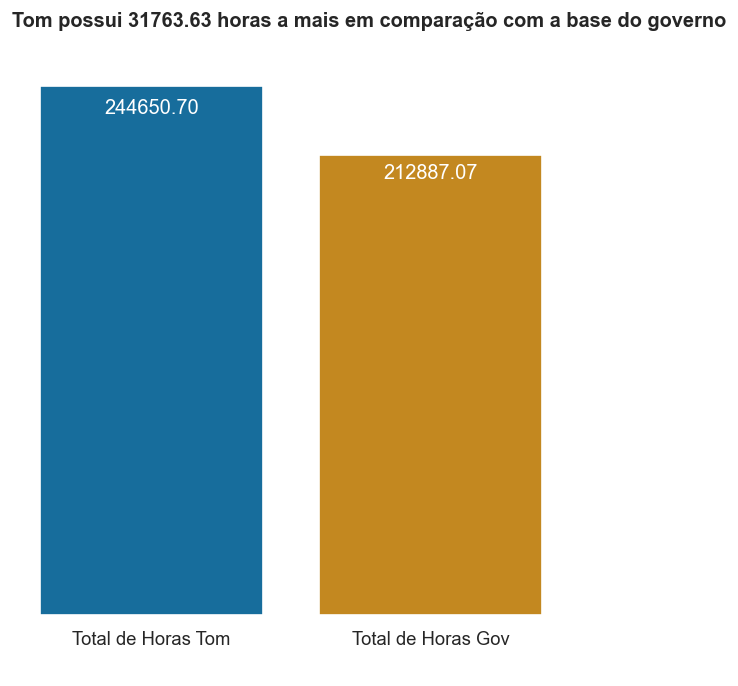

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

str_title = f'Tom possui {diff_hours:.2f} horas a mais em comparação com a base do governo'

ax = sns.barplot(x=['Total de Horas Tom', 'Total de Horas Gov'], y=[total_tom, total_gov], hue=['Total de Horas Tom', 'Total de Horas Gov'])
ax.set_title(str_title, fontsize=12, weight='bold', loc='left', pad=20)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.yaxis.set_visible(False)

for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(False)

for bar in ax.patches:
    x = bar.get_width() / 2 + bar.get_x()
    y = bar.get_height()

    ax.text(
        x=x, y=y * 0.94,
        s=f'{y:.2f}',
        va='bottom', ha='center',
        color='white',
    )

plt.show()

In [165]:
diff_pct = (total_tom - total_gov) / total_tom * 100

print(f'A base da empresa Tom registrou um total de horas superior em {diff_pct:.2f}%')

A base da empresa Tom registrou um total de horas superior em 12.98%


In [162]:
complete['diff_abs'] = complete['ch_total_tom'] - complete['ch_total_gov']

complete.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento,diff_abs
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0,60.71429
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0,2.14290
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0,1.28574
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0,2.35719
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0,51.42861


In [163]:
complete['diff_pct'] = (complete['ch_total_tom'] - complete['ch_total_gov']) / complete['ch_total_tom'] * 100

complete.head()

,mes,codigo_escola,codigo_funcionario,categoria,ch_total_tom,fator,ch_diaria_tom,ch_total_gov,ch_diaria_gov,dias_trabalhados,ch_suprimento,diff_abs,diff_pct
0,Abril,ABC1,100,NAO REGENCIA,125.0,5.0,3.571429,64.28571,2.142857,30.0,15.0,60.71429,48.571432
1,Abril,ABC1,100,REGENCIA,45.0,4.5,1.428571,42.85710,1.428570,30.0,10.0,2.14290,4.762000
2,Abril,ABC1,101,REGENCIA,27.0,4.5,0.857143,25.71426,0.857142,30.0,6.0,1.28574,4.762000
3,Abril,ABC1,102,REGENCIA,49.5,4.5,1.571429,47.14281,1.571427,30.0,11.0,2.35719,4.762000
4,Abril,ABC1,103,REGENCIA,90.0,4.5,2.857143,38.57139,1.285713,30.0,9.0,51.42861,57.142900


In [166]:
mean_abs_diff = complete['diff_abs'].mean()
mean_pct_diff = complete['diff_pct'].mean()

print(f'Em média, a empresa tem uma diferença de {mean_abs_diff:.2f} horas totais em relação a base do governo')
print(f'E uma média de {diff_pct:.2f}% em relação a mesma')

Em média, a empresa tem uma diferença de 12.05 horas totais em relação a base do governo
E uma média de 12.98% em relação a mesma


In [169]:
schools_comp = (
    complete
    .groupby('codigo_escola')
    .agg({
        'ch_total_tom': 'sum',
        'ch_total_gov': 'sum',
        'diff_abs': 'sum',
        'diff_pct': 'mean',
    })
).reset_index()

schools_comp

,codigo_escola,ch_total_tom,ch_total_gov,diff_abs,diff_pct
0,ABC1,6105.380000,5255.283276,850.096724,12.028915
1,ABC10,6737.290000,5381.283847,1356.006153,17.578640
2,ABC11,5855.940901,5087.283609,768.657292,12.970947
3,ABC12,6050.140000,5473.141119,576.998881,5.395781
4,ABC13,7055.990000,6295.711576,760.278424,7.069881
5,ABC14,9150.490000,7881.567188,1268.922812,14.106176
6,ABC15,7058.560000,6673.712000,384.848000,6.348599
7,ABC16,11284.230225,9649.711157,1634.519068,10.462892
8,ABC17,8097.299482,6811.569299,1285.730183,17.349137
9,ABC18,6705.630000,5617.569948,1088.060052,17.353749
